# Introduction

[Jupyter](http://jupyter.org/) is an interactive browser based notebook environment where we can combine text, code execution and visualization. It supports multiple programming languages through it's language specific kernel plugins. However, it is widely used with Python in scientific computing and data science communities. The availability of large number of high quality open source libraries useful for many tasks in scientific computing,numerical linear algebra, machine learning and visualization ensures that Python is being widely used in these fields. Jupyter notebooks are an excellent environment for learning and teaching because of the interactivity.

In this short blogpost, I will explore few topics to illustrate the interactivity of the jupyter environment and the python availability of high quality libraries in the ecosystem.
- Montecarlo calculation of $\pi$
- Image Compression using Singular value decomposition

# A note on installation of jupyter

Installation of jupyter and other important packages individually is cumbersome. Thanks to [Continuum Analytics](https://www.continuum.io/downloads) we have Anaconda python distribution in which almost all of the useful packages are bundled. Install anaconda.

   # Montecarlo calculation of $\pi$

I had earlier written about calculating the mathematical constant $\pi$ using [montecarlo method](https://medium.com/@rameshputalapattu/life-of-pi-a-gophers-tale-2e6922b80792). It involves generating random points on a unit square and counting the number of points inside the unit quarter circle. We will write a function ```mc_pi``` to calculate $\pi$. In that function, we will also visualize the process of montecarlo simulation using matplotlib library.

In [17]:
import numpy as np
import matplotlib.pyplot as plt


In [18]:
#This line is required to display visualizations in the browser
%matplotlib inline

In [19]:
def mc_pi(ntrials):
    """
    calculate the value of pi using montecarlo method and visualize the process
    
    """
    x = np.random.random(ntrials)
    y = np.random.random(ntrials)
    #masking
    inside_circle = x**2+y**2 < 1
    unit_circle_x = np.linspace(0,1,100)
    unit_circle = [unit_circle_x,np.sqrt(1.0-unit_circle_x**2)]
    plt.plot(*unit_circle,color='black')
    plt.scatter(x[inside_circle],y[inside_circle],marker='.',color='blue',s=1)
    plt.scatter(x[~inside_circle],y[~inside_circle],marker='.',color='red',s=1)
    plt.title("value of $\pi$="+str( 4.0*np.sum(inside_circle)/float(ntrials)))
       

We are able to write the function ```mc_pi``` without making use of any explicit ```for``` loops - thanks to vectorization features in numpy library. Due to a concept called broadcasting in numpy, we are able to subtract a vector from a scalar (1.0 - unit_circle_x**2 ) to compute the y co-ordinate of the unit circle. 

Now we will make use of ipywidgets module to pass the parameter interactively to the function ```mc_pi```. ipywidgets module provide widgets to generate the UI controls in the notebook itself with which the user can interact. We can drag the slider and observe how the value of pi calculated by mc_pi function changes with the number of trials.

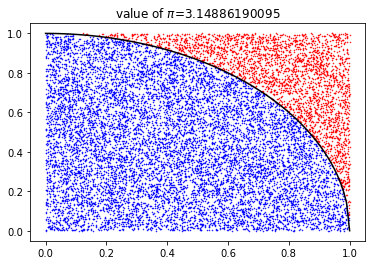

In [20]:
from ipywidgets import interact,interactive,interact_manual
mc_widget=interactive(mc_pi,ntrials=(1,100000,10));
mc_widget

In [21]:
from skimage import data
from skimage.color import rgb2gray

In [22]:
from numpy.linalg import svd

In [23]:
def compress_svd(image,k):
    U,s,V = svd(image,full_matrices=False)
    reconst_matrix = np.dot(U[:,:k],np.dot(np.diag(s[:k]),V[:k,:]))
   
    return reconst_matrix,s

In [ ]:
from skimage import img_as_ubyte,img_as_float
gray_images = {
        "cat":rgb2gray(img_as_float(data.chelsea())),
        "astro":rgb2gray(img_as_float(data.astronaut())),
        "camera":data.camera(),
        "coin": data.coins(),
        "clock":data.clock(),
        "blobs":data.binary_blobs(),
        "coffee":rgb2gray(img_as_float(data.coffee()))
}

In [ ]:
def compress_show_gray_images(img_name,k):
    image=gray_images[img_name]
    original_shape = image.shape
    reconst_img,s = compress_svd(image,k)
    fig,axes = plt.subplots(1,2,figsize=(8,5))
    axes[0].plot(s)
    compression_ratio =100.0* (k*(original_shape[0] + original_shape[1])+k)/(original_shape[0]*original_shape[1])
    axes[1].set_title("compression ratio={:.2f}".format(compression_ratio)+"%")
    axes[1].imshow(reconst_img,cmap='gray')
    axes[1].axis('off')
    fig.tight_layout()
    
    
    

In [ ]:
interact(compress_show_gray_images,img_name=list(gray_images.keys()),k=(1,300));

In [ ]:
color_images = {
    "cat":img_as_float(data.chelsea()),
    "astro":img_as_float(data.astronaut()),
    "coffee":img_as_float(data.coffee())
    
}

In [ ]:
def compress_show_color_images_reshape(img_name,k):
    image = color_images[img_name]
    original_shape = image.shape
    image_reshaped = image.reshape((original_shape[0],original_shape[1]*3))
    image_reconst,_ = compress_svd(image_reshaped,k)
    image_reconst = image_reconst.reshape(original_shape)
    compression_ratio =100.0* (k*(original_shape[0] + 3*original_shape[1])+k)/(original_shape[0]*original_shape[1]*original_shape[2])
    plt.title("compression ratio={:.2f}".format(compression_ratio)+"%")
    plt.imshow(image_reconst)

In [ ]:
interact(compress_show_color_images_reshape,img_name=list(color_images.keys()),k=(0,512));

In [ ]:
def compress_show_color_images_layer(img_name,k):
    image = color_images[img_name]
    original_shape = image.shape
    image_reconst_layers = [compress_svd(image[:,:,i],k)[0] for i in range(3)]
    image_reconst = np.zeros(image.shape)
    for i in range(3):
        image_reconst[:,:,i] = image_reconst_layers[i]
    
    compression_ratio =100.0*3* (k*(original_shape[0] + original_shape[1])+k)/(original_shape[0]*original_shape[1]*original_shape[2])
    plt.title("compression ratio={:.2f}".format(compression_ratio)+"%")
    
    plt.imshow(image_reconst)

In [ ]:
interact(compress_show_color_images_layer,img_name=list(color_images.keys()),k=(1,550));